In [1]:
#importing
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import torch

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
# File to Load
value_add = "value_add_kabao.csv"

In [3]:
# Import the data into a Pandas DataFrame
data_df = pd.read_csv(value_add)
data_df.head()

,0BILL_TYPE___T,0FISCYEAR,0DIVISION___T,Transactoin State,Material Level 2,Material Level 3,Material Group,Material Grade,Plant Nbr,Ship To City,...,Ship To State,Ship To Region,Ship To Country,Cal_Quarter_text,Fiscal_Year_Period_Text,Product ID,Date,Mill_Amount_in_SC,Qty_in_Conv_Vol,ASP
0,DOMESTIC INVOICE,2016,OSB,Finished Product,VALUE ADD,OSB Long-Lengths,OSB Long-Lengths,A,1010.0,DULUTH,...,Georgia,SOUTHEAST,US,2016.Q3,2016.08,39947,2016.08.25,7869.31,35,224.84
1,DOMESTIC INVOICE,2018,OSB,Finished Product,VALUE ADD,OSB TechShield,OSB TechShield,A,1025.0,CHARLOTTE,...,North Carolina,MID ATLANTIC,US,2018.Q4,2018.10,39956,2018.10.11,9737.28,36,270.48
2,DOMESTIC INVOICE,2017,OSB,Finished Product,VALUE ADD,OSB TN 350,OSB TN 350,A,1025.0,CHESAPEAKE,...,Virginia,MID ATLANTIC,US,2017.Q4,2017.12,22651,2017.12.15,10884.16,37,294.17
3,DOMESTIC INVOICE,2018,OSB,Finished Product,VALUE ADD,OSB TechShield,OSB TechShield,A,1005.0,SCHERTZ,...,Texas,SOUTHWEST,US,2018.Q1,2018.03,39956,2018.03.02,13598.50,36,377.74
4,DOMESTIC INVOICE,2018,OSB,Finished Product,VALUE ADD,OSB TN 350,OSB TN 350,A,1015.0,TUCKER,...,Georgia,SOUTHEAST,US,2018.Q1,2018.02,22651,2018.02.20,11917.67,37,322.10


In [4]:
data_df.count()

0BILL_TYPE___T             215158
0FISCYEAR                  219230
0DIVISION___T              219230
Transactoin State          219230
Material Level 2           219230
Material Level 3           219230
Material Group             219230
Material Grade             219225
Plant Nbr                  219229
Ship To City               219230
Ship To County             206097
Ship To State              219230
Ship To Region             219222
Ship To Country            215070
Cal_Quarter_text           219230
Fiscal_Year_Period_Text    219230
Product ID                 219230
Date                       219230
Mill_Amount_in_SC          219230
Qty_in_Conv_Vol            219230
ASP                        219197
dtype: int64

In [5]:
drop_df = data_df.dropna(how='any')

In [6]:
drop_df.count()

0BILL_TYPE___T             205979
0FISCYEAR                  205979
0DIVISION___T              205979
Transactoin State          205979
Material Level 2           205979
Material Level 3           205979
Material Group             205979
Material Grade             205979
Plant Nbr                  205979
Ship To City               205979
Ship To County             205979
Ship To State              205979
Ship To Region             205979
Ship To Country            205979
Cal_Quarter_text           205979
Fiscal_Year_Period_Text    205979
Product ID                 205979
Date                       205979
Mill_Amount_in_SC          205979
Qty_in_Conv_Vol            205979
ASP                        205979
dtype: int64

In [7]:
# Load and sort the dataframe.
dropped_df = pd.read_csv('value_add_kabao.csv', parse_dates=['Date'], index_col='Date')
df_dv = dropped_df.filter(['Date', 'Qty_in_Conv_Vol'])
df_dv.head()

,Qty_in_Conv_Vol
Date,
2016-08-25,35
2018-10-11,36
2017-12-15,37
2018-03-02,36
2018-02-20,37


In [8]:
# resample stationary data to monthly since there are missing dates due to weekends
df_m = df_dv['Qty_in_Conv_Vol'].resample('M').mean()
df_m.head()

Date
2014-01-31    10.285946
2014-02-28    34.664545
2014-03-31    37.350276
2014-04-30    37.406119
2014-05-31    39.527968
Freq: M, Name: Qty_in_Conv_Vol, dtype: float64

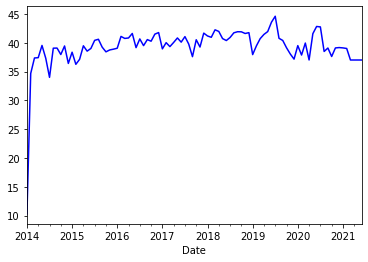

In [9]:
# chart the initial monthly data and do a prelimiary test to see if it's stationary 
fig, ax = plt.subplots()
df_m.plot(ax=ax, color = 'blue')
plt.show()

# AVERAGE, COUNTS, AND UNIQUE

In [10]:
# # Cacluate the average of Converted Volume
Average_Converted_Volume = data_df["Qty_in_Conv_Vol"].mean()
Average_Converted_Volume

39.11235232404324

In [11]:
#Average ASP
Average_ASP = data_df["ASP"].mean()
Average_ASP

247.45033818894592

In [12]:
#Sum of Converted Volume
Converted_Volume_Count = (data_df["Qty_in_Conv_Vol"].sum())
Converted_Volume_Count

8574601

In [13]:
# Calculate the Number of Unique Diagnosis Related Groups (DRGs): 
Unique_material = len(drop_df["Material Level 2"].unique())
Unique_material

1

In [14]:
# Calculate the Number of Unique Diagnosis Related Groups (DRGs): 
Unique_state_count = len(dropped_df["Ship To State"].unique())
Unique_state_count

59

In [15]:
Unique_city_count = len(dropped_df["Ship To City"].unique())
Unique_city_count

1634

In [16]:
Unique_Material_Grade = len(dropped_df["Material Grade"].unique())
Unique_Material_Grade

4

In [17]:
# Create a summary data frame to hold the Analysis Results

Unique_Analysis_df = pd.DataFrame([
    {"Unique Material": Unique_material, 
     "Unique State Count": Unique_state_count, 
     "Unique City Count": Unique_city_count, 
     "Unique Material Grade": Unique_Material_Grade, 
      "Qty in Conv Vol": Converted_Volume_Count,
      "Average Selling Price": Average_ASP,


    }
])
Unique_Analysis_df

,Unique Material,Unique State Count,Unique City Count,Unique Material Grade,Qty in Conv Vol,Average Selling Price
0,1,59,1634,4,8574601,247.450338


# ALASKA

In [18]:
# File to Load
Alaska_Weather = "alaska.csv"
Alaska_Weather = pd.read_csv(Alaska_Weather)
Alaska_Weather.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,2014-01-01 00:00:00,0,0,0.0,11.1,5,1,0,07:45 AM,07:29 PM,...,19,22,9,80,0.0,1017,19,10,21,14
1,2014-01-01 03:00:00,0,0,0.0,11.1,5,1,0,07:45 AM,07:29 PM,...,19,23,11,82,0.0,1015,19,10,25,14
2,2014-01-01 06:00:00,0,0,0.0,11.1,5,1,0,07:45 AM,07:29 PM,...,19,19,11,83,0.0,1015,19,10,28,11
3,2014-01-01 09:00:00,0,0,0.0,11.1,5,6,0,07:45 AM,07:29 PM,...,23,14,7,68,0.0,1016,22,10,19,12
4,2014-01-01 12:00:00,0,0,0.0,11.1,5,7,0,07:45 AM,07:29 PM,...,28,9,8,52,0.0,1015,28,10,358,8


In [19]:
# Alaska_Weather.info()

In [20]:
# convert the 'Date' column to datetime format 
# Alaska_Weather['date_time']= pd.to_datetime(Alaska_Weather['date_time'])
Alaska_Weather['Date']= pd.to_datetime(Alaska_Weather['date_time'])
Alaska_Weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17536 entries, 0 to 17535
Data columns (total 26 columns):
date_time            17536 non-null object
maxtempC             17536 non-null int64
mintempC             17536 non-null int64
totalSnow_cm         17536 non-null float64
sunHour              17536 non-null float64
uvIndex              17536 non-null int64
uvIndex.1            17536 non-null int64
moon_illumination    17536 non-null int64
moonrise             17536 non-null object
moonset              17536 non-null object
sunrise              17536 non-null object
sunset               17536 non-null object
DewPointC            17536 non-null int64
FeelsLikeC           17536 non-null int64
HeatIndexC           17536 non-null int64
WindChillC           17536 non-null int64
WindGustKmph         17536 non-null int64
cloudcover           17536 non-null int64
humidity             17536 non-null int64
precipMM             17536 non-null float64
pressure             17536 non-null int6

In [21]:
# Filter the data so that only AK data is in the dataframe
DataFrame_AK = data_df.loc[data_df["Ship To State"] == "Alaska", :]
DataFrame_AK.head()



# #Drop unwanted columns.
# Merged_df.drop(columns=['sunHour', 'uvIndex', 'uvIndex.1', 'moon_illumination', 'moonrise', 'moonset',
#                        'sunrise', 'sunset', 'FeelsLikeC', 'DewPointC', 'tempC', 'winddirDegree', 'cloudcover', 'visibility', 
#                         '0BILL_TYPE___T', '0DIVISION___T', 'Material Level 3', 'Material Group', 'Plant Nbr', 'Cal_Quarter_text',
#                        'Product ID', 'Fiscal_Year_Period_Text', '0FISCYEAR'])

,0BILL_TYPE___T,0FISCYEAR,0DIVISION___T,Transactoin State,Material Level 2,Material Level 3,Material Group,Material Grade,Plant Nbr,Ship To City,...,Ship To State,Ship To Region,Ship To Country,Cal_Quarter_text,Fiscal_Year_Period_Text,Product ID,Date,Mill_Amount_in_SC,Qty_in_Conv_Vol,ASP
3412,X-BORDER INVOICE,2016,OSB,Finished Product,VALUE ADD,OSB Long-Lengths,OSB Long-Lengths,A,1061.0,ANCHORAGE,...,Alaska,NORTHWEST,US,2016.Q1,2016.01,24761,2016.01.07,6592.32,39,169.03
3679,X-BORDER INVOICE,2017,OSB,Finished Product,VALUE ADD,OSB Long-Lengths,OSB Long-Lengths,A,1066.0,ANCHORAGE,...,Alaska,NORTHWEST,US,2017.Q3,2017.08,39948,2017.08.10,1949.11,6,324.85
6356,X-BORDER INVOICE,2015,OSB,Finished Product,VALUE ADD,OSB Long-Lengths,OSB Long-Lengths,A,1061.0,ANCHORAGE,...,Alaska,NORTHWEST,US,2015.Q2,2015.05,24761,2015.05.22,5275.20,39,135.26
7143,X-BORDER INVOICE,2016,OSB,Finished Product,VALUE ADD,OSB Long-Lengths,OSB Long-Lengths,A,1061.0,ANCHORAGE,...,Alaska,NORTHWEST,US,2016.Q3,2016.08,39948,2016.08.15,8448.91,39,216.64
8929,DOMESTIC INVOICE,2018,OSB,Finished Product,VALUE ADD,OSB TN 350,OSB TN 350,A,1625.0,ANCHORAGE,...,Alaska,NATIONAL,US,2018.Q3,2018.07,39975,2018.07.30,977.09,3,325.70


In [22]:
DataFrame_AK.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171 entries, 3412 to 219027
Data columns (total 21 columns):
0BILL_TYPE___T             171 non-null object
0FISCYEAR                  171 non-null int64
0DIVISION___T              171 non-null object
Transactoin State          171 non-null object
Material Level 2           171 non-null object
Material Level 3           171 non-null object
Material Group             171 non-null object
Material Grade             171 non-null object
Plant Nbr                  171 non-null float64
Ship To City               171 non-null object
Ship To County             171 non-null object
Ship To State              171 non-null object
Ship To Region             171 non-null object
Ship To Country            171 non-null object
Cal_Quarter_text           171 non-null object
Fiscal_Year_Period_Text    171 non-null float64
Product ID                 171 non-null int64
Date                       171 non-null object
Mill_Amount_in_SC          171 non-null flo

In [23]:
# convert the 'Date' column to datetime format 
DataFrame_AK['Date']= pd.to_datetime(DataFrame_AK['Date'])

DataFrame_AK.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171 entries, 3412 to 219027
Data columns (total 21 columns):
0BILL_TYPE___T             171 non-null object
0FISCYEAR                  171 non-null int64
0DIVISION___T              171 non-null object
Transactoin State          171 non-null object
Material Level 2           171 non-null object
Material Level 3           171 non-null object
Material Group             171 non-null object
Material Grade             171 non-null object
Plant Nbr                  171 non-null float64
Ship To City               171 non-null object
Ship To County             171 non-null object
Ship To State              171 non-null object
Ship To Region             171 non-null object
Ship To Country            171 non-null object
Cal_Quarter_text           171 non-null object
Fiscal_Year_Period_Text    171 non-null float64
Product ID                 171 non-null int64
Date                       171 non-null datetime64[ns]
Mill_Amount_in_SC          171 non-

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [30]:
# Merge two dataframes using an inner join
Merged_AK_df = pd.merge(Alaska_Weather, DataFrame_AK, on="Date")
Merged_AK_df

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,...,Ship To County,Ship To State,Ship To Region,Ship To Country,Cal_Quarter_text,Fiscal_Year_Period_Text,Product ID,Mill_Amount_in_SC,Qty_in_Conv_Vol,ASP
0,2014-02-19 00:00:00,0,0,0.0,11.6,6,1,58,11:24 PM,10:32 AM,...,ANCHORAGE,Alaska,NORTHWEST,US,2014.Q1,2014.02,24761,32270.00,163,197.98
1,2014-02-19 00:00:00,0,0,0.0,11.6,6,1,58,11:24 PM,10:32 AM,...,ANCHORAGE,Alaska,NORTHWEST,US,2014.Q1,2014.02,24761,-32270.00,-163,197.98
2,2014-02-19 00:00:00,0,0,0.0,11.6,6,1,58,11:24 PM,10:32 AM,...,ANCHORAGE,Alaska,NORTHWEST,US,2014.Q1,2014.02,24761,47390.00,163,290.74
3,2014-04-25 00:00:00,0,0,0.0,11.6,6,1,13,04:07 AM,04:28 PM,...,ANCHORAGE,Alaska,NORTHWEST,US,2014.Q2,2014.04,24761,28307.70,163,173.67
4,2014-04-28 00:00:00,0,0,0.0,11.6,6,1,0,06:23 AM,07:17 PM,...,ANCHORAGE,Alaska,NORTHWEST,US,2014.Q2,2014.04,22941,25888.14,153,169.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,2019-06-11 00:00:00,31,22,0.0,11.6,7,1,59,02:46 PM,02:24 AM,...,ANCHORAGE,Alaska,NORTHWEST,US,2019.Q2,2019.06,39947,2389.11,20,119.46
167,2019-06-29 00:00:00,29,21,0.0,11.6,7,1,6,03:58 AM,05:01 PM,...,ANCHORAGE,Alaska,NORTHWEST,US,2019.Q2,2019.06,39948,5300.52,39,135.91
168,2019-07-10 00:00:00,28,21,0.0,6.5,6,1,53,02:33 PM,01:50 AM,...,ANCHORAGE,Alaska,NORTHWEST,US,2019.Q3,2019.07,39948,5300.52,39,135.91
169,2019-07-10 00:00:00,28,21,0.0,6.5,6,1,53,02:33 PM,01:50 AM,...,ANCHORAGE,Alaska,NORTHWEST,US,2019.Q3,2019.07,39947,3851.19,29,132.80


In [25]:
#Drop unwanted columns.
Merged_df.drop(columns=['sunHour', 'uvIndex', 'uvIndex.1', 'moon_illumination', 'moonrise', 'moonset',
                       'sunrise', 'sunset', 'FeelsLikeC', 'DewPointC', 'tempC', 'winddirDegree', 'cloudcover', 'visibility', 
                        '0BILL_TYPE___T', '0DIVISION___T', 'Material Level 3', 'Material Group', 'Plant Nbr', 
                        'Cal_Quarter_text', 'Product ID', 'Fiscal_Year_Period_Text', '0FISCYEAR', 'Ship To Region', 
                       'Material Grade', 'Ship To County', 'maxtempC', 'mintempC', 'pressure', 'date_time', 'ASP', 'Ship To Country', 
                       'Transactoin State'])

,totalSnow_cm,HeatIndexC,WindChillC,WindGustKmph,humidity,precipMM,windspeedKmph,Date,Material Level 2,Ship To City,Ship To State,Mill_Amount_in_SC,Qty_in_Conv_Vol
0,0.0,24,22,15,81,0.0,9,2014-02-19,VALUE ADD,ANCHORAGE,Alaska,32270.00,163
1,0.0,24,22,15,81,0.0,9,2014-02-19,VALUE ADD,ANCHORAGE,Alaska,-32270.00,-163
2,0.0,24,22,15,81,0.0,9,2014-02-19,VALUE ADD,ANCHORAGE,Alaska,47390.00,163
3,0.0,26,24,1,81,0.0,0,2014-04-25,VALUE ADD,ANCHORAGE,Alaska,28307.70,163
4,0.0,26,24,5,81,0.0,3,2014-04-28,VALUE ADD,ANCHORAGE,Alaska,25888.14,153
...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,0.0,29,27,18,73,0.0,13,2019-06-11,VALUE ADD,ANCHORAGE,Alaska,2389.11,20
167,0.0,28,26,26,73,0.0,21,2019-06-29,VALUE ADD,ANCHORAGE,Alaska,5300.52,39
168,0.0,27,24,7,92,6.9,4,2019-07-10,VALUE ADD,ANCHORAGE,Alaska,5300.52,39
169,0.0,27,24,7,92,6.9,4,2019-07-10,VALUE ADD,ANCHORAGE,Alaska,3851.19,29


In [ ]:
# BRB



# ARIZONA 

In [26]:
# File to Load
Arizona_Weather = "arizona.csv"
Arizona_Weather = pd.read_csv(Arizona_Weather)
Arizona_Weather.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,2014-01-01 00:00:00,0,0,0.0,8.7,6,1,0,06:15 AM,06:02 PM,...,23,8,54,90,0.0,1016,23,10,86,5
1,2014-01-01 03:00:00,0,0,0.0,8.7,6,1,0,06:15 AM,06:02 PM,...,23,6,47,90,0.2,1015,23,5,241,4
2,2014-01-01 06:00:00,0,0,0.0,8.7,6,6,0,06:15 AM,06:02 PM,...,22,9,33,89,0.0,1016,22,10,197,5
3,2014-01-01 09:00:00,0,0,0.0,8.7,6,5,0,06:15 AM,06:02 PM,...,24,4,36,86,0.2,1017,24,9,255,3
4,2014-01-01 12:00:00,0,0,0.0,8.7,6,7,0,06:15 AM,06:02 PM,...,25,10,13,80,0.0,1015,25,10,306,9


In [41]:
# convert the 'Date' column to datetime format 
Arizona_Weather['Date']= pd.to_datetime(Arizona_Weather['date_time'])
Arizona_Weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17536 entries, 0 to 17535
Data columns (total 26 columns):
date_time            17536 non-null object
maxtempC             17536 non-null int64
mintempC             17536 non-null int64
totalSnow_cm         17536 non-null float64
sunHour              17536 non-null float64
uvIndex              17536 non-null int64
uvIndex.1            17536 non-null int64
moon_illumination    17536 non-null int64
moonrise             17536 non-null object
moonset              17536 non-null object
sunrise              17536 non-null object
sunset               17536 non-null object
DewPointC            17536 non-null int64
FeelsLikeC           17536 non-null int64
HeatIndexC           17536 non-null int64
WindChillC           17536 non-null int64
WindGustKmph         17536 non-null int64
cloudcover           17536 non-null int64
humidity             17536 non-null int64
precipMM             17536 non-null float64
pressure             17536 non-null int6

In [42]:
# Filter the data so that only AZ data is in the dataframe
DataFrame_AZ = data_df.loc[data_df["Ship To State"] == "Arizona", :]
DataFrame_AZ.head()

,0BILL_TYPE___T,0FISCYEAR,0DIVISION___T,Transactoin State,Material Level 2,Material Level 3,Material Group,Material Grade,Plant Nbr,Ship To City,...,Ship To State,Ship To Region,Ship To Country,Cal_Quarter_text,Fiscal_Year_Period_Text,Product ID,Date,Mill_Amount_in_SC,Qty_in_Conv_Vol,ASP
53,CANCELLATION INVOICE,2017,OSB,Finished Product,VALUE ADD,OSB TechShield,OSB TechShield,A,1005.0,PHOENIX,...,Arizona,WEST,US,2017.Q1,2017.02,31165,2017.02.21,-39400.70,-141,279.44
66,DEBIT MEMO,2018,OSB,Finished Product,VALUE ADD,OSB TechShield,OSB TechShield,A,1020.0,PHOENIX,...,Arizona,WEST,US,2018.Q1,2018.02,31165,2018.02.15,39062.02,141,277.04
114,DOMESTIC INVOICE,2018,OSB,Finished Product,VALUE ADD,OSB TechShield,OSB TechShield,A,1020.0,PHOENIX,...,Arizona,WEST,US,2018.Q1,2018.01,31165,2018.01.01,37876.61,141,268.63
299,DOMESTIC INVOICE,2016,OSB,Finished Product,VALUE ADD,OSB TechShield,OSB TechShield,A,1020.0,PHOENIX,...,Arizona,WEST,US,2016.Q1,2016.03,31122,2016.03.23,31836.67,141,225.79
349,X-BORDER INVOICE,2015,OSB,Finished Product,VALUE ADD,OSB Long-Lengths,OSB Long-Lengths,A,1061.0,PAULDEN,...,Arizona,WEST,US,2015.Q3,2015.08,24762,2015.08.02,9926.23,72,137.86


In [29]:
# convert the 'Date' column to datetime format 
DataFrame_AZ['Date']= pd.to_datetime(DataFrame_AZ['Date'])

DataFrame_AZ.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3006 entries, 53 to 219058
Data columns (total 21 columns):
0BILL_TYPE___T             2989 non-null object
0FISCYEAR                  3006 non-null int64
0DIVISION___T              3006 non-null object
Transactoin State          3006 non-null object
Material Level 2           3006 non-null object
Material Level 3           3006 non-null object
Material Group             3006 non-null object
Material Grade             3006 non-null object
Plant Nbr                  3006 non-null float64
Ship To City               3006 non-null object
Ship To County             2989 non-null object
Ship To State              3006 non-null object
Ship To Region             3006 non-null object
Ship To Country            2968 non-null object
Cal_Quarter_text           3006 non-null object
Fiscal_Year_Period_Text    3006 non-null float64
Product ID                 3006 non-null int64
Date                       3006 non-null datetime64[ns]
Mill_Amount_in_SC 

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [33]:
# Merge two dataframes using an inner join
Merged_AZ_df = pd.merge(Arizona_Weather, DataFrame_AZ, on="Date")


In [37]:
#Drop unwanted columns.
Merged_AZ_df.drop(columns=['sunHour', 'uvIndex', 'uvIndex.1', 'moon_illumination', 'moonrise', 'moonset',
                       'sunrise', 'sunset', 'FeelsLikeC', 'DewPointC', 'tempC', 'winddirDegree', 'cloudcover', 'visibility', 
                        '0BILL_TYPE___T', '0DIVISION___T', 'Material Level 3', 'Material Group', 'Plant Nbr', 
                        'Cal_Quarter_text', 'Product ID', 'Fiscal_Year_Period_Text', '0FISCYEAR', 'Ship To Region', 
                       'Material Grade', 'Ship To County', 'maxtempC', 'mintempC', 'pressure', 'date_time', 'ASP', 'Ship To Country', 
                       'Transactoin State'])

,totalSnow_cm,HeatIndexC,WindChillC,WindGustKmph,humidity,precipMM,windspeedKmph,Date,Material Level 2,Ship To City,Ship To State,Mill_Amount_in_SC,Qty_in_Conv_Vol
0,0.0,24,21,12,90,0.0,7,2014-01-06,VALUE ADD,PHOENIX,Arizona,4057.62,16
1,0.0,24,21,12,90,0.0,7,2014-01-06,VALUE ADD,PHOENIX,Arizona,-4057.62,-16
2,0.0,24,21,12,90,0.0,7,2014-01-06,VALUE ADD,PHOENIX,Arizona,4057.62,16
3,0.0,24,21,12,90,0.0,7,2014-01-06,VALUE ADD,PHOENIX,Arizona,-4057.62,-16
4,0.0,24,21,12,90,0.0,7,2014-01-06,VALUE ADD,PHOENIX,Arizona,4057.62,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2766,0.0,25,22,15,95,0.0,8,2019-12-30,VALUE ADD,PHOENIX,Arizona,29889.22,141
2767,0.0,25,22,15,95,0.0,8,2019-12-30,VALUE ADD,PHOENIX,Arizona,29355.48,139
2768,0.0,25,23,7,96,0.0,4,2019-12-31,VALUE ADD,PHOENIX,Arizona,16398.55,91
2769,0.0,25,23,7,96,0.0,4,2019-12-31,VALUE ADD,PHOENIX,Arizona,29355.48,139


In [38]:
#BRB



# CALIFORNIA

In [39]:
# File to Load
California_Weather = "california.csv"
California_Weather = pd.read_csv(California_Weather)
California_Weather.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,2014-01-01 00:00:00,16,4,0.0,8.7,3,1,0,07:57 AM,06:39 PM,...,6,9,0,22,0.0,1021,6,10,330,4
1,2014-01-01 03:00:00,16,4,0.0,8.7,3,1,0,07:57 AM,06:39 PM,...,4,8,0,27,0.0,1021,5,10,33,4
2,2014-01-01 06:00:00,16,4,0.0,8.7,3,1,0,07:57 AM,06:39 PM,...,3,11,0,32,0.0,1022,4,10,39,5
3,2014-01-01 09:00:00,16,4,0.0,8.7,3,4,0,07:57 AM,06:39 PM,...,11,10,0,14,0.0,1023,12,10,46,6
4,2014-01-01 12:00:00,16,4,0.0,8.7,3,5,0,07:57 AM,06:39 PM,...,16,17,0,10,0.0,1020,16,10,77,15


In [40]:
# convert the 'Date' column to datetime format 
California_Weather['Date']= pd.to_datetime(California_Weather['date_time'])
California_Weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17536 entries, 0 to 17535
Data columns (total 26 columns):
date_time            17536 non-null object
maxtempC             17536 non-null int64
mintempC             17536 non-null int64
totalSnow_cm         17536 non-null float64
sunHour              17536 non-null float64
uvIndex              17536 non-null int64
uvIndex.1            17536 non-null int64
moon_illumination    17536 non-null int64
moonrise             17536 non-null object
moonset              17536 non-null object
sunrise              17536 non-null object
sunset               17536 non-null object
DewPointC            17536 non-null int64
FeelsLikeC           17536 non-null int64
HeatIndexC           17536 non-null int64
WindChillC           17536 non-null int64
WindGustKmph         17536 non-null int64
cloudcover           17536 non-null int64
humidity             17536 non-null int64
precipMM             17536 non-null float64
pressure             17536 non-null int6

In [51]:
# Filter the data so that only CA data is in the dataframe
DataFrame_CA = data_df.loc[data_df["Ship To State"] == "California", :]
DataFrame_CA.head()

,0BILL_TYPE___T,0FISCYEAR,0DIVISION___T,Transactoin State,Material Level 2,Material Level 3,Material Group,Material Grade,Plant Nbr,Ship To City,...,Ship To State,Ship To Region,Ship To Country,Cal_Quarter_text,Fiscal_Year_Period_Text,Product ID,Date,Mill_Amount_in_SC,Qty_in_Conv_Vol,ASP
13,DOMESTIC INVOICE,2014,OSB,Finished Product,VALUE ADD,OSB Long-Lengths,OSB Long-Lengths,A,1795.0,ROCKLIN,...,California,WEST,US,2014.Q4,2014.11,25374,2014.11.14,8769.60,38,230.78
29,DOMESTIC INVOICE,2015,OSB,Finished Product,VALUE ADD,OSB Long-Lengths,OSB Long-Lengths,A,1800.0,ROCKLIN,...,California,WEST,US,2015.Q4,2015.10,24760,2015.10.20,6767.28,28,241.69
57,DOMESTIC INVOICE,2020,OSB,Finished Product,VALUE ADD,OSB TechShield,OSB TechShield,A,1020.0,STOCKTON,...,California,WEST,US,2020.Q1,2020.01,31165,2020.01.21,26643.45,141,188.96
60,DOMESTIC INVOICE,2019,OSB,Finished Product,VALUE ADD,OSB TechShield,OSB TechShield,A,1800.0,ROCKLIN,...,California,WEST,US,2019.Q1,2019.02,39960,2019.02.06,13406.98,57,235.21
93,X-BORDER INVOICE,2018,OSB,Finished Product,VALUE ADD,OSB TechShield,OSB TechShield,A,2041.0,ANDERSON,...,California,WEST,US,2018.Q1,2018.02,31122,2018.02.19,42921.45,151,284.25


In [44]:
# convert the 'Date' column to datetime format 
DataFrame_CA['Date']= pd.to_datetime(DataFrame_CA['Date'])

DataFrame_CA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10565 entries, 13 to 219212
Data columns (total 21 columns):
0BILL_TYPE___T             10557 non-null object
0FISCYEAR                  10565 non-null int64
0DIVISION___T              10565 non-null object
Transactoin State          10565 non-null object
Material Level 2           10565 non-null object
Material Level 3           10565 non-null object
Material Group             10565 non-null object
Material Grade             10565 non-null object
Plant Nbr                  10565 non-null float64
Ship To City               10565 non-null object
Ship To County             10557 non-null object
Ship To State              10565 non-null object
Ship To Region             10565 non-null object
Ship To Country            10541 non-null object
Cal_Quarter_text           10565 non-null object
Fiscal_Year_Period_Text    10565 non-null float64
Product ID                 10565 non-null int64
Date                       10565 non-null datetime64[ns]

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [45]:
# Merge two dataframes using an inner join
Merged_CA_df = pd.merge(California_Weather, DataFrame_CA, on="Date")

In [46]:
#Drop unwanted columns.
Merged_CA_df.drop(columns=['sunHour', 'uvIndex', 'uvIndex.1', 'moon_illumination', 'moonrise', 'moonset',
                       'sunrise', 'sunset', 'FeelsLikeC', 'DewPointC', 'tempC', 'winddirDegree', 'cloudcover', 'visibility', 
                        '0BILL_TYPE___T', '0DIVISION___T', 'Material Level 3', 'Material Group', 'Plant Nbr', 
                        'Cal_Quarter_text', 'Product ID', 'Fiscal_Year_Period_Text', '0FISCYEAR', 'Ship To Region', 
                       'Material Grade', 'Ship To County', 'maxtempC', 'mintempC', 'pressure', 'date_time', 'ASP', 'Ship To Country', 
                       'Transactoin State'])

,totalSnow_cm,HeatIndexC,WindChillC,WindGustKmph,humidity,precipMM,windspeedKmph,Date,Material Level 2,Ship To City,Ship To State,Mill_Amount_in_SC,Qty_in_Conv_Vol
0,0.0,6,4,17,33,0.0,8,2014-01-06,VALUE ADD,RIVERSIDE,California,32475.73,151
1,0.0,6,4,17,33,0.0,8,2014-01-06,VALUE ADD,LA MIRADA,California,-15652.77,-60
2,0.0,6,4,17,33,0.0,8,2014-01-06,VALUE ADD,RIVERSIDE,California,33056.34,151
3,0.0,6,4,17,33,0.0,8,2014-01-06,VALUE ADD,FREMONT,California,13215.49,49
4,0.0,6,4,17,33,0.0,8,2014-01-06,VALUE ADD,LA MIRADA,California,15652.77,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10278,0.0,5,4,16,61,0.0,8,2019-12-31,VALUE ADD,MODESTO,California,27324.86,136
10279,0.0,6,6,9,61,0.0,4,2020-01-01,VALUE ADD,DINUBA,California,32514.05,141
10280,0.0,6,6,9,61,0.0,4,2020-01-01,VALUE ADD,DINUBA,California,33879.55,144
10281,0.0,6,6,9,61,0.0,4,2020-01-01,VALUE ADD,NORTH HIGHLANDS,California,35675.13,141


In [47]:
#BRB

# IDAHO

In [48]:
# File to Load
Idaho_Weather = "idaho.csv"
Idaho_Weather = pd.read_csv(Idaho_Weather)
Idaho_Weather.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,2014-01-01 00:00:00,-2,-12,0.0,8.7,1,1,0,08:52 AM,06:55 PM,...,-11,13,67,95,0.0,1025,-8,2,173,6
1,2014-01-01 03:00:00,-2,-12,0.0,8.7,1,1,0,08:52 AM,06:55 PM,...,-12,24,37,93,0.0,1028,-7,10,177,12
2,2014-01-01 06:00:00,-2,-12,0.0,8.7,1,1,0,08:52 AM,06:55 PM,...,-13,14,25,97,0.0,1031,-9,2,174,6
3,2014-01-01 09:00:00,-2,-12,0.0,8.7,1,1,0,08:52 AM,06:55 PM,...,-13,20,29,95,0.0,1032,-8,2,181,9
4,2014-01-01 12:00:00,-2,-12,0.0,8.7,1,2,0,08:52 AM,06:55 PM,...,-3,1,31,88,0.0,1034,-3,10,333,1


In [49]:
# convert the 'Date' column to datetime format 
Idaho_Weather['Date']= pd.to_datetime(Idaho_Weather['date_time'])
Idaho_Weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17536 entries, 0 to 17535
Data columns (total 26 columns):
date_time            17536 non-null object
maxtempC             17536 non-null int64
mintempC             17536 non-null int64
totalSnow_cm         17536 non-null float64
sunHour              17536 non-null float64
uvIndex              17536 non-null int64
uvIndex.1            17536 non-null int64
moon_illumination    17536 non-null int64
moonrise             17536 non-null object
moonset              17536 non-null object
sunrise              17536 non-null object
sunset               17536 non-null object
DewPointC            17536 non-null int64
FeelsLikeC           17536 non-null int64
HeatIndexC           17536 non-null int64
WindChillC           17536 non-null int64
WindGustKmph         17536 non-null int64
cloudcover           17536 non-null int64
humidity             17536 non-null int64
precipMM             17536 non-null float64
pressure             17536 non-null int6

In [50]:
# Filter the data so that only ID data is in the dataframe
DataFrame_ID = data_df.loc[data_df["Ship To State"] == "Idaho", :]
DataFrame_ID.head()

,0BILL_TYPE___T,0FISCYEAR,0DIVISION___T,Transactoin State,Material Level 2,Material Level 3,Material Group,Material Grade,Plant Nbr,Ship To City,...,Ship To State,Ship To Region,Ship To Country,Cal_Quarter_text,Fiscal_Year_Period_Text,Product ID,Date,Mill_Amount_in_SC,Qty_in_Conv_Vol,ASP
6905,DOMESTIC INVOICE,2018,OSB,Finished Product,VALUE ADD,OSB Long-Lengths,OSB Long-Lengths,A,1066.0,OLDTOWN,...,Idaho,NORTHWEST,US,2018.Q2,2018.05,22942,2018.05.28,8705.72,26,334.84
7931,DOMESTIC INVOICE,2018,OSB,Finished Product,VALUE ADD,OSB TechShield,OSB TechShield,E,1066.0,GOODING,...,Idaho,NORTHWEST,US,2018.Q4,2018.12,31187,2018.12.03,2775.32,28,99.12
19718,X-BORDER INVOICE,2019,OSB,Finished Product,VALUE ADD,OSB TechShield,OSB TechShield,E,1066.0,SAINT MARIES,...,Idaho,NORTHWEST,US,2019.Q1,2019.03,31187,2019.03.22,4328.35,48,90.17
39738,X-BORDER INVOICE,2018,OSB,Finished Product,VALUE ADD,OSB Long-Lengths,OSB Long-Lengths,A,1066.0,BOISE,...,Idaho,NORTHWEST,US,2018.Q2,2018.06,39948,2018.06.17,12476.97,39,319.92
92910,CANCELLATION INVOICE,2018,OSB,Finished Product,VALUE ADD,OSB Long-Lengths,OSB Long-Lengths,A,1066.0,OLDTOWN,...,Idaho,NORTHWEST,US,2018.Q2,2018.05,39948,2018.05.22,-3377.41,-10,337.74


In [52]:
# convert the 'Date' column to datetime format 
DataFrame_ID['Date']= pd.to_datetime(DataFrame_ID['Date'])

DataFrame_ID.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 6905 to 194272
Data columns (total 21 columns):
0BILL_TYPE___T             14 non-null object
0FISCYEAR                  14 non-null int64
0DIVISION___T              14 non-null object
Transactoin State          14 non-null object
Material Level 2           14 non-null object
Material Level 3           14 non-null object
Material Group             14 non-null object
Material Grade             14 non-null object
Plant Nbr                  14 non-null float64
Ship To City               14 non-null object
Ship To County             14 non-null object
Ship To State              14 non-null object
Ship To Region             14 non-null object
Ship To Country            14 non-null object
Cal_Quarter_text           14 non-null object
Fiscal_Year_Period_Text    14 non-null float64
Product ID                 14 non-null int64
Date                       14 non-null datetime64[ns]
Mill_Amount_in_SC          14 non-null float64
Qty_in_

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [53]:
# Merge two dataframes using an inner join
Merged_ID_df = pd.merge(Idaho_Weather, DataFrame_ID, on="Date")

In [54]:
#Drop unwanted columns.
Merged_ID_df.drop(columns=['sunHour', 'uvIndex', 'uvIndex.1', 'moon_illumination', 'moonrise', 'moonset',
                       'sunrise', 'sunset', 'FeelsLikeC', 'DewPointC', 'tempC', 'winddirDegree', 'cloudcover', 'visibility', 
                        '0BILL_TYPE___T', '0DIVISION___T', 'Material Level 3', 'Material Group', 'Plant Nbr', 
                        'Cal_Quarter_text', 'Product ID', 'Fiscal_Year_Period_Text', '0FISCYEAR', 'Ship To Region', 
                       'Material Grade', 'Ship To County', 'maxtempC', 'mintempC', 'pressure', 'date_time', 'ASP', 'Ship To Country', 
                       'Transactoin State'])

,totalSnow_cm,HeatIndexC,WindChillC,WindGustKmph,humidity,precipMM,windspeedKmph,Date,Material Level 2,Ship To City,Ship To State,Mill_Amount_in_SC,Qty_in_Conv_Vol
0,0.0,15,15,10,66,0.0,5,2015-07-13,VALUE ADD,BOISE,Idaho,668.29,3
1,0.0,-5,-10,18,79,0.0,13,2018-02-23,VALUE ADD,BOISE,Idaho,41161.54,167
2,0.0,1,-1,9,69,0.0,6,2018-04-13,VALUE ADD,OLDTOWN,Idaho,3377.41,10
3,0.0,8,7,17,47,0.0,8,2018-04-25,VALUE ADD,BOISE,Idaho,55645.57,167
4,0.0,13,12,14,58,0.0,6,2018-05-22,VALUE ADD,OLDTOWN,Idaho,-3377.41,-10
5,0.0,13,12,14,58,0.0,6,2018-05-22,VALUE ADD,OLDTOWN,Idaho,3377.41,10
6,0.0,11,10,14,89,0.0,7,2018-05-28,VALUE ADD,OLDTOWN,Idaho,8705.72,26
7,0.0,11,10,14,89,0.0,7,2018-05-28,VALUE ADD,OLDTOWN,Idaho,8598.24,25
8,0.0,13,12,42,47,0.0,20,2018-06-17,VALUE ADD,BOISE,Idaho,12476.97,39
9,0.0,13,12,42,47,0.0,20,2018-06-17,VALUE ADD,BOISE,Idaho,36735.38,116


In [55]:
#BRB

# OREGON

In [57]:
# File to Load
Oregon_Weather = "oregon.csv"
Oregon_Weather = pd.read_csv(Oregon_Weather)
Oregon_Weather.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,2014-01-01 00:00:00,0,0,0.0,6.9,2,1,0,08:41 AM,06:34 PM,...,1,10,9,89,0.0,1028,1,10,77,5
1,2014-01-01 03:00:00,0,0,0.0,6.9,2,1,0,08:41 AM,06:34 PM,...,1,9,6,89,0.0,1029,0,10,57,4
2,2014-01-01 06:00:00,0,0,0.0,6.9,2,2,0,08:41 AM,06:34 PM,...,1,11,7,89,0.0,1028,1,10,69,5
3,2014-01-01 09:00:00,0,0,0.0,6.9,2,2,0,08:41 AM,06:34 PM,...,5,5,12,71,0.0,1029,4,10,326,4
4,2014-01-01 12:00:00,0,0,0.0,6.9,2,3,0,08:41 AM,06:34 PM,...,10,6,9,63,0.0,1027,9,10,41,5


In [58]:
# convert the 'Date' column to datetime format 
Oregon_Weather['Date']= pd.to_datetime(Oregon_Weather['date_time'])
Oregon_Weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17536 entries, 0 to 17535
Data columns (total 26 columns):
date_time            17536 non-null object
maxtempC             17536 non-null int64
mintempC             17536 non-null int64
totalSnow_cm         17536 non-null float64
sunHour              17536 non-null float64
uvIndex              17536 non-null int64
uvIndex.1            17536 non-null int64
moon_illumination    17536 non-null int64
moonrise             17536 non-null object
moonset              17536 non-null object
sunrise              17536 non-null object
sunset               17536 non-null object
DewPointC            17536 non-null int64
FeelsLikeC           17536 non-null int64
HeatIndexC           17536 non-null int64
WindChillC           17536 non-null int64
WindGustKmph         17536 non-null int64
cloudcover           17536 non-null int64
humidity             17536 non-null int64
precipMM             17536 non-null float64
pressure             17536 non-null int6

In [59]:
# Filter the data so that only OR data is in the dataframe
DataFrame_OR = data_df.loc[data_df["Ship To State"] == "Oregon", :]
DataFrame_OR.head()

,0BILL_TYPE___T,0FISCYEAR,0DIVISION___T,Transactoin State,Material Level 2,Material Level 3,Material Group,Material Grade,Plant Nbr,Ship To City,...,Ship To State,Ship To Region,Ship To Country,Cal_Quarter_text,Fiscal_Year_Period_Text,Product ID,Date,Mill_Amount_in_SC,Qty_in_Conv_Vol,ASP
145,X-BORDER INVOICE,2017,OSB,Finished Product,VALUE ADD,OSB TechShield,OSB TechShield,A,1041.0,BEAVERTON,...,Oregon,NORTHWEST,US,2017.Q4,2017.10,39956,2017.10.15,19484.72,52,374.71
393,DOMESTIC INVOICE,2018,OSB,Finished Product,VALUE ADD,OSB Long-Lengths,OSB Long-Lengths,A,1066.0,ALBANY,...,Oregon,NORTHWEST,US,2018.Q3,2018.07,39948,2018.07.31,38227.10,129,296.33
416,DOMESTIC INVOICE,2018,OSB,Finished Product,VALUE ADD,OSB TN 350,OSB TN 350,A,1030.0,PRINEVILLE,...,Oregon,NORTHWEST,US,2018.Q1,2018.02,25441,2018.02.05,34655.85,129,268.65
1105,X-BORDER INVOICE,2016,OSB,Finished Product,VALUE ADD,OSB Long-Lengths,OSB Long-Lengths,A,1061.0,SALEM,...,Oregon,NORTHWEST,US,2016.Q4,2016.11,39947,2016.11.27,9123.63,46,198.34
1251,DOMESTIC INVOICE,2015,OSB,Finished Product,VALUE ADD,OSB Long-Lengths,OSB Long-Lengths,A,1061.0,PORTLAND,...,Oregon,NORTHWEST,US,2015.Q1,2015.01,24761,2015.01.25,26075.28,167,156.14


In [60]:
# convert the 'Date' column to datetime format 
DataFrame_OR['Date']= pd.to_datetime(DataFrame_OR['Date'])

DataFrame_OR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 781 entries, 145 to 218931
Data columns (total 21 columns):
0BILL_TYPE___T             781 non-null object
0FISCYEAR                  781 non-null int64
0DIVISION___T              781 non-null object
Transactoin State          781 non-null object
Material Level 2           781 non-null object
Material Level 3           781 non-null object
Material Group             781 non-null object
Material Grade             781 non-null object
Plant Nbr                  781 non-null float64
Ship To City               781 non-null object
Ship To County             781 non-null object
Ship To State              781 non-null object
Ship To Region             781 non-null object
Ship To Country            781 non-null object
Cal_Quarter_text           781 non-null object
Fiscal_Year_Period_Text    781 non-null float64
Product ID                 781 non-null int64
Date                       781 non-null datetime64[ns]
Mill_Amount_in_SC          781 non-n

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [61]:
# Merge two dataframes using an inner join
Merged_OR_df = pd.merge(Oregon_Weather, DataFrame_OR, on="Date")

In [71]:
#Drop unwanted columns.
Merged_OR_df.drop(columns=['sunHour', 'uvIndex', 'uvIndex.1', 'moon_illumination', 'moonrise', 'moonset',
                       'sunrise', 'sunset', 'FeelsLikeC', 'DewPointC', 'tempC', 'winddirDegree', 'cloudcover', 'visibility', 
                        '0BILL_TYPE___T', '0DIVISION___T', 'Material Level 3', 'Material Group', 'Plant Nbr', 
                        'Cal_Quarter_text', 'Product ID', 'Fiscal_Year_Period_Text', '0FISCYEAR', 'Ship To Region', 
                       'Material Grade', 'Ship To County', 'maxtempC', 'mintempC', 'pressure', 'date_time', 'ASP', 'Ship To Country', 
                       'Transactoin State'])

,totalSnow_cm,HeatIndexC,WindChillC,WindGustKmph,humidity,precipMM,windspeedKmph,Date,Material Level 2,Ship To City,Ship To State,Mill_Amount_in_SC,Qty_in_Conv_Vol
0,0.0,2,-1,20,48,0.0,10,2014-01-27,VALUE ADD,PORTLAND,Oregon,34720.00,163
1,1.6,-9,-16,28,49,0.0,18,2014-02-06,VALUE ADD,TUALATIN,Oregon,3680.23,22
2,1.6,-9,-16,28,49,0.0,18,2014-02-06,VALUE ADD,TUALATIN,Oregon,5235.30,29
3,0.0,4,1,20,76,0.0,10,2014-03-12,VALUE ADD,PORTLAND,Oregon,35476.96,170
4,0.0,4,1,20,76,0.0,10,2014-03-12,VALUE ADD,PORTLAND,Oregon,34794.72,167
...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,0.0,25,23,4,55,0.0,3,2019-07-26,VALUE ADD,HILLSBORO,Oregon,2674.43,25
772,0.0,22,21,1,68,0.0,1,2019-07-31,VALUE ADD,ALBANY,Oregon,26201.01,167
773,0.0,24,23,6,53,0.0,4,2019-08-04,VALUE ADD,ALBANY,Oregon,30420.50,167
774,0.0,6,5,14,85,1.4,9,2019-11-25,VALUE ADD,CLACKAMAS,Oregon,16851.46,93


In [63]:
#BRB

# TENNESSEE

In [65]:
# File to Load
Tennessee_Weather = "tennessee.csv"
Tennessee_Weather = pd.read_csv(Tennessee_Weather)
Tennessee_Weather.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,1/1/2014 0:00,-5,-10,0.2,3.5,2,1,0,8:16 AM,6:33 PM,...,-15,33,19,89,0.0,1024,-8,10,55,19
1,1/1/2014 3:00,-5,-10,0.2,3.5,2,1,0,8:16 AM,6:33 PM,...,-15,25,28,89,0.0,1023,-9,10,42,15
2,1/1/2014 6:00,-5,-10,0.2,3.5,2,1,0,8:16 AM,6:33 PM,...,-17,20,68,92,0.0,1023,-10,10,46,14
3,1/1/2014 9:00,-5,-10,0.2,3.5,2,1,0,8:16 AM,6:33 PM,...,-17,24,69,90,0.0,1023,-10,10,40,18
4,1/1/2014 12:00,-5,-10,0.2,3.5,2,1,0,8:16 AM,6:33 PM,...,-12,23,100,84,0.0,1023,-6,10,55,18


In [66]:
# convert the 'Date' column to datetime format 
Tennessee_Weather['Date']= pd.to_datetime(Tennessee_Weather['date_time'])
Tennessee_Weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17536 entries, 0 to 17535
Data columns (total 26 columns):
date_time            17536 non-null object
maxtempC             17536 non-null int64
mintempC             17536 non-null int64
totalSnow_cm         17536 non-null float64
sunHour              17536 non-null float64
uvIndex              17536 non-null int64
uvIndex.1            17536 non-null int64
moon_illumination    17536 non-null int64
moonrise             17536 non-null object
moonset              17536 non-null object
sunrise              17536 non-null object
sunset               17536 non-null object
DewPointC            17536 non-null int64
FeelsLikeC           17536 non-null int64
HeatIndexC           17536 non-null int64
WindChillC           17536 non-null int64
WindGustKmph         17536 non-null int64
cloudcover           17536 non-null int64
humidity             17536 non-null int64
precipMM             17536 non-null float64
pressure             17536 non-null int6

In [75]:
# Filter the data so that only TN data is in the dataframe
DataFrame_TN = data_df.loc[data_df["Ship To State"] == "Tennessee", :]
DataFrame_TN.head()

,0BILL_TYPE___T,0FISCYEAR,0DIVISION___T,Transactoin State,Material Level 2,Material Level 3,Material Group,Material Grade,Plant Nbr,Ship To City,...,Ship To State,Ship To Region,Ship To Country,Cal_Quarter_text,Fiscal_Year_Period_Text,Product ID,Date,Mill_Amount_in_SC,Qty_in_Conv_Vol,ASP
37,DOMESTIC INVOICE,2015,OSB,Finished Product,VALUE ADD,OSB TechShield,OSB TechShield,A,1015.0,MURFREESBORO,...,Tennessee,SOUTHEAST,US,2015.Q4,2015.10,9100,2015.10.01,7137.72,36,198.27
63,NaN,2020,OSB,Finished Product,VALUE ADD,OSB TechShield,OSB TechShield,A,1005.0,NASHVILLE,...,Tennessee,SOUTHEAST,NaN,2020.Q2,2020.05,10007,2020-05-09,8500.80,36,236.13
65,DOMESTIC INVOICE,2019,OSB,Finished Product,VALUE ADD,OSB TechShield,OSB TechShield,A,1621.0,COLUMBIA,...,Tennessee,NATIONAL,US,2019.Q2,2019.06,39960,2019.06.10,3472.03,18,192.89
74,DOMESTIC INVOICE,2019,OSB,Finished Product,VALUE ADD,OSB Long-Lengths,OSB Long-Lengths,A,1010.0,PIPERTON,...,Tennessee,SOUTHEAST,US,2019.Q4,2019.12,39947,2019.12.03,4024.08,35,114.97
92,DOMESTIC INVOICE,2016,OSB,Finished Product,VALUE ADD,OSB Long-Lengths,OSB Long-Lengths,A,1010.0,PIPERTON,...,Tennessee,SOUTHEAST,US,2016.Q2,2016.06,39947,2016.06.08,7392.38,35,211.21


In [68]:
# convert the 'Date' column to datetime format 
DataFrame_TN['Date']= pd.to_datetime(DataFrame_TN['Date'])

DataFrame_TN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15155 entries, 37 to 219210
Data columns (total 21 columns):
0BILL_TYPE___T             12406 non-null object
0FISCYEAR                  15155 non-null int64
0DIVISION___T              15155 non-null object
Transactoin State          15155 non-null object
Material Level 2           15155 non-null object
Material Level 3           15155 non-null object
Material Group             15155 non-null object
Material Grade             15155 non-null object
Plant Nbr                  15155 non-null float64
Ship To City               15155 non-null object
Ship To County             12406 non-null object
Ship To State              15155 non-null object
Ship To Region             15155 non-null object
Ship To Country            12398 non-null object
Cal_Quarter_text           15155 non-null object
Fiscal_Year_Period_Text    15155 non-null float64
Product ID                 15155 non-null int64
Date                       15155 non-null datetime64[ns]

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [69]:
# Merge two dataframes using an inner join
Merged_TN_df = pd.merge(Tennessee_Weather, DataFrame_TN, on="Date")

In [70]:
#Drop unwanted columns.
Merged_TN_df.drop(columns=['sunHour', 'uvIndex', 'uvIndex.1', 'moon_illumination', 'moonrise', 'moonset',
                       'sunrise', 'sunset', 'FeelsLikeC', 'DewPointC', 'tempC', 'winddirDegree', 'cloudcover', 'visibility', 
                        '0BILL_TYPE___T', '0DIVISION___T', 'Material Level 3', 'Material Group', 'Plant Nbr', 
                        'Cal_Quarter_text', 'Product ID', 'Fiscal_Year_Period_Text', '0FISCYEAR', 'Ship To Region', 
                       'Material Grade', 'Ship To County', 'maxtempC', 'mintempC', 'pressure', 'date_time', 'ASP', 'Ship To Country', 
                       'Transactoin State'])

,totalSnow_cm,HeatIndexC,WindChillC,WindGustKmph,humidity,precipMM,windspeedKmph,Date,Material Level 2,Ship To City,Ship To State,Mill_Amount_in_SC,Qty_in_Conv_Vol
0,0.0,0,-5,36,93,0.0,17,2014-01-14,VALUE ADD,CLARKSVILLE,Tennessee,-8830.82,-34
1,0.0,0,-5,36,93,0.0,17,2014-01-14,VALUE ADD,CLARKSVILLE,Tennessee,-8830.82,-34
2,0.0,0,-5,36,93,0.0,17,2014-01-14,VALUE ADD,CLARKSVILLE,Tennessee,8830.82,34
3,0.0,0,-5,36,93,0.0,17,2014-01-14,VALUE ADD,CLARKSVILLE,Tennessee,8830.82,34
4,0.0,0,-5,36,93,0.0,17,2014-01-14,VALUE ADD,CLARKSVILLE,Tennessee,-8830.82,-34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11803,0.0,-2,-10,44,72,0.0,32,2019-12-31,VALUE ADD,ASHLAND CITY,Tennessee,9581.91,37
11804,0.0,-2,-10,44,72,0.0,32,2019-12-31,VALUE ADD,ASHLAND CITY,Tennessee,-9581.91,-37
11805,0.0,-2,-10,44,72,0.0,32,2019-12-31,VALUE ADD,ASHLAND CITY,Tennessee,-8927.90,-37
11806,0.0,-1,-5,23,91,0.0,13,2020-01-01,VALUE ADD,COLLIERVILLE,Tennessee,5845.35,35


In [72]:
#BRB

# UTAH

In [73]:
# File to Load
Utah_Weather = "utah.csv"
Utah_Weather = pd.read_csv(Utah_Weather)
Utah_Weather.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,2014-01-01 00:00:00,-8,-29,0.0,8.7,2,1,0,06:33 AM,05:13 PM,...,-34,15,0,82,0.0,1033,-27,10,290,7
1,2014-01-01 03:00:00,-8,-29,0.0,8.7,2,1,0,06:33 AM,05:13 PM,...,-35,14,0,79,0.0,1032,-28,10,302,7
2,2014-01-01 06:00:00,-8,-29,0.0,8.7,2,2,0,06:33 AM,05:13 PM,...,-33,11,2,63,0.0,1033,-29,10,288,5
3,2014-01-01 09:00:00,-8,-29,0.0,8.7,2,2,0,06:33 AM,05:13 PM,...,-14,10,0,44,0.0,1031,-11,10,296,6
4,2014-01-01 12:00:00,-8,-29,0.0,8.7,2,2,0,06:33 AM,05:13 PM,...,-11,8,0,50,0.0,1025,-8,10,276,6


In [74]:
# convert the 'Date' column to datetime format 
Utah_Weather['Date']= pd.to_datetime(Utah_Weather['date_time'])
Utah_Weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17536 entries, 0 to 17535
Data columns (total 26 columns):
date_time            17536 non-null object
maxtempC             17536 non-null int64
mintempC             17536 non-null int64
totalSnow_cm         17536 non-null float64
sunHour              17536 non-null float64
uvIndex              17536 non-null int64
uvIndex.1            17536 non-null int64
moon_illumination    17536 non-null int64
moonrise             17536 non-null object
moonset              17536 non-null object
sunrise              17536 non-null object
sunset               17536 non-null object
DewPointC            17536 non-null int64
FeelsLikeC           17536 non-null int64
HeatIndexC           17536 non-null int64
WindChillC           17536 non-null int64
WindGustKmph         17536 non-null int64
cloudcover           17536 non-null int64
humidity             17536 non-null int64
precipMM             17536 non-null float64
pressure             17536 non-null int6

In [77]:
# Filter the data so that only UT data is in the dataframe
DataFrame_UT = data_df.loc[data_df["Ship To State"] == "Utah", :]
DataFrame_UT.head()

,0BILL_TYPE___T,0FISCYEAR,0DIVISION___T,Transactoin State,Material Level 2,Material Level 3,Material Group,Material Grade,Plant Nbr,Ship To City,...,Ship To State,Ship To Region,Ship To Country,Cal_Quarter_text,Fiscal_Year_Period_Text,Product ID,Date,Mill_Amount_in_SC,Qty_in_Conv_Vol,ASP
791,CANCELLATION INVOICE,2014,OSB,Finished Product,VALUE ADD,OSB TechShield,OSB TechShield,A,1020.0,SALT LAKE CITY,...,Utah,WEST,US,2014.Q4,2014.12,22493,2014.12.15,-30096.00,-142,211.94
1605,X-BORDER INVOICE,2016,OSB,Finished Product,VALUE ADD,OSB TechShield,OSB TechShield,A,1041.0,SALT LAKE CITY,...,Utah,WEST,US,2016.Q4,2016.12,39955,2016.12.20,5981.41,26,230.05
7929,X-BORDER INVOICE,2015,OSB,Finished Product,VALUE ADD,OSB TechShield,OSB TechShield,A,1041.0,SALT LAKE CITY,...,Utah,WEST,US,2015.Q4,2015.10,31160,2015.10.02,30396.80,154,197.38
8232,DOMESTIC INVOICE,2019,OSB,Finished Product,VALUE ADD,OSB TechShield,OSB TechShield,A,1020.0,SALT LAKE CITY,...,Utah,WEST,US,2019.Q4,2019.10,39956,2019.10.08,26777.20,144,185.95
8637,X-BORDER INVOICE,2019,OSB,Finished Product,VALUE ADD,OSB Long-Lengths,OSB Long-Lengths,A,1066.0,SALT LAKE CITY,...,Utah,WEST,US,2019.Q3,2019.07,39947,2019.07.03,18826.24,154,122.25


In [78]:
# convert the 'Date' column to datetime format 
DataFrame_UT['Date']= pd.to_datetime(DataFrame_UT['Date'])

DataFrame_UT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154 entries, 791 to 218164
Data columns (total 21 columns):
0BILL_TYPE___T             152 non-null object
0FISCYEAR                  154 non-null int64
0DIVISION___T              154 non-null object
Transactoin State          154 non-null object
Material Level 2           154 non-null object
Material Level 3           154 non-null object
Material Group             154 non-null object
Material Grade             154 non-null object
Plant Nbr                  154 non-null float64
Ship To City               154 non-null object
Ship To County             152 non-null object
Ship To State              154 non-null object
Ship To Region             154 non-null object
Ship To Country            152 non-null object
Cal_Quarter_text           154 non-null object
Fiscal_Year_Period_Text    154 non-null float64
Product ID                 154 non-null int64
Date                       154 non-null datetime64[ns]
Mill_Amount_in_SC          154 non-n

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [79]:
# Merge two dataframes using an inner join
Merged_UT_df = pd.merge(Utah_Weather, DataFrame_UT, on="Date")

In [80]:
#Drop unwanted columns.
Merged_UT_df.drop(columns=['sunHour', 'uvIndex', 'uvIndex.1', 'moon_illumination', 'moonrise', 'moonset',
                       'sunrise', 'sunset', 'FeelsLikeC', 'DewPointC', 'tempC', 'winddirDegree', 'cloudcover', 'visibility', 
                        '0BILL_TYPE___T', '0DIVISION___T', 'Material Level 3', 'Material Group', 'Plant Nbr', 
                        'Cal_Quarter_text', 'Product ID', 'Fiscal_Year_Period_Text', '0FISCYEAR', 'Ship To Region', 
                       'Material Grade', 'Ship To County', 'maxtempC', 'mintempC', 'pressure', 'date_time', 'ASP', 'Ship To Country', 
                       'Transactoin State'])

,totalSnow_cm,HeatIndexC,WindChillC,WindGustKmph,humidity,precipMM,windspeedKmph,Date,Material Level 2,Ship To City,Ship To State,Mill_Amount_in_SC,Qty_in_Conv_Vol
0,3.1,-15,-21,20,99,0.3,9,2014-02-06,VALUE ADD,SALT LAKE CITY,Utah,4437.35,16
1,3.1,-15,-21,20,99,0.3,9,2014-02-06,VALUE ADD,SALT LAKE CITY,Utah,28674.85,127
2,0.3,-17,-20,10,100,0.2,5,2014-02-20,VALUE ADD,SALT LAKE CITY,Utah,31946.41,142
3,0.0,-17,-22,12,96,0.0,6,2014-03-31,VALUE ADD,SALT LAKE CITY,Utah,33278.87,142
4,0.0,5,4,9,76,0.2,4,2014-05-01,VALUE ADD,SALT LAKE CITY,Utah,31948.16,145
...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,0.0,-3,-3,5,39,0.0,3,2019-11-10,VALUE ADD,SALT LAKE CITY,Utah,5050.81,24
142,0.0,-17,-21,12,88,0.0,5,2019-12-14,VALUE ADD,SAINT GEORGE,Utah,6943.87,34
143,0.0,-17,-21,10,48,0.0,5,2019-12-15,VALUE ADD,SALT LAKE CITY,Utah,32991.49,139
144,0.0,-17,-21,10,48,0.0,5,2019-12-15,VALUE ADD,SALT LAKE CITY,Utah,3967.64,16


In [81]:
#BRB

# WASHINGTON

In [82]:
# File to Load
Washington_Weather = "washington.csv"
Washington_Weather = pd.read_csv(Washington_Weather)
Washington_Weather.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,2014-01-01 00:00:00,6,-2,0.0,8.7,2,1,0,08:15 AM,06:39 PM,...,1,1,5,62,0.0,1028,-2,10,328,1
1,2014-01-01 03:00:00,6,-2,0.0,8.7,2,1,0,08:15 AM,06:39 PM,...,0,4,26,61,0.0,1028,-1,10,167,3
2,2014-01-01 06:00:00,6,-2,0.0,8.7,2,1,0,08:15 AM,06:39 PM,...,-4,17,45,68,0.0,1030,-1,10,174,11
3,2014-01-01 09:00:00,6,-2,0.0,8.7,2,2,0,08:15 AM,06:39 PM,...,-1,14,17,59,0.0,1029,2,10,180,12
4,2014-01-01 12:00:00,6,-2,0.0,8.7,2,3,0,08:15 AM,06:39 PM,...,4,15,30,57,0.0,1027,6,10,164,13


In [83]:
# convert the 'Date' column to datetime format 
Washington_Weather['Date']= pd.to_datetime(Washington_Weather['date_time'])
Washington_Weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17536 entries, 0 to 17535
Data columns (total 26 columns):
date_time            17536 non-null object
maxtempC             17536 non-null int64
mintempC             17536 non-null int64
totalSnow_cm         17536 non-null float64
sunHour              17536 non-null float64
uvIndex              17536 non-null int64
uvIndex.1            17536 non-null int64
moon_illumination    17536 non-null int64
moonrise             17536 non-null object
moonset              17536 non-null object
sunrise              17536 non-null object
sunset               17536 non-null object
DewPointC            17536 non-null int64
FeelsLikeC           17536 non-null int64
HeatIndexC           17536 non-null int64
WindChillC           17536 non-null int64
WindGustKmph         17536 non-null int64
cloudcover           17536 non-null int64
humidity             17536 non-null int64
precipMM             17536 non-null float64
pressure             17536 non-null int6

In [84]:
# Filter the data so that only WA data is in the dataframe
DataFrame_WA = data_df.loc[data_df["Ship To State"] == "Washington", :]
DataFrame_WA.head()

,0BILL_TYPE___T,0FISCYEAR,0DIVISION___T,Transactoin State,Material Level 2,Material Level 3,Material Group,Material Grade,Plant Nbr,Ship To City,...,Ship To State,Ship To Region,Ship To Country,Cal_Quarter_text,Fiscal_Year_Period_Text,Product ID,Date,Mill_Amount_in_SC,Qty_in_Conv_Vol,ASP
109,DOMESTIC INVOICE,2015,OSB,Finished Product,VALUE ADD,OSB TN 350,OSB TN 350,A,1041.0,VANCOUVER,...,Washington,NORTHWEST,US,2015.Q2,2015.04,23763,2015.04.04,20697.60,103,200.95
188,X-BORDER INVOICE,2018,OSB,Finished Product,VALUE ADD,OSB Long-Lengths,OSB Long-Lengths,A,1066.0,VANCOUVER,...,Washington,NORTHWEST,US,2018.Q3,2018.07,39948,2018.07.04,15569.05,52,299.40
249,X-BORDER INVOICE,2014,OSB,Finished Product,VALUE ADD,OSB Long-Lengths,OSB Long-Lengths,A,1061.0,TACOMA,...,Washington,NORTHWEST,US,2014.Q3,2014.08,24761,2014.08.15,29848.00,170,175.58
297,X-BORDER INVOICE,2016,OSB,Finished Product,VALUE ADD,OSB Long-Lengths,OSB Long-Lengths,A,1061.0,VANCOUVER,...,Washington,NORTHWEST,US,2016.Q1,2016.02,22941,2016.02.15,3271.51,21,155.79
318,CANCELLATION INVOICE,2015,OSB,Finished Product,VALUE ADD,OSB Long-Lengths,OSB Long-Lengths,A,1061.0,EVERETT,...,Washington,NORTHWEST,US,2015.Q1,2015.02,22941,2015.02.06,-3671.89,-26,141.23


In [85]:
# convert the 'Date' column to datetime format 
DataFrame_WA['Date']= pd.to_datetime(DataFrame_WA['Date'])

DataFrame_WA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3663 entries, 109 to 219122
Data columns (total 21 columns):
0BILL_TYPE___T             3663 non-null object
0FISCYEAR                  3663 non-null int64
0DIVISION___T              3663 non-null object
Transactoin State          3663 non-null object
Material Level 2           3663 non-null object
Material Level 3           3663 non-null object
Material Group             3663 non-null object
Material Grade             3660 non-null object
Plant Nbr                  3663 non-null float64
Ship To City               3663 non-null object
Ship To County             3662 non-null object
Ship To State              3663 non-null object
Ship To Region             3660 non-null object
Ship To Country            3663 non-null object
Cal_Quarter_text           3663 non-null object
Fiscal_Year_Period_Text    3663 non-null float64
Product ID                 3663 non-null int64
Date                       3663 non-null datetime64[ns]
Mill_Amount_in_SC

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [86]:
# Merge two dataframes using an inner join
Merged_WA_df = pd.merge(Washington_Weather, DataFrame_WA, on="Date")

In [87]:
#Drop unwanted columns.
Merged_WA_df.drop(columns=['sunHour', 'uvIndex', 'uvIndex.1', 'moon_illumination', 'moonrise', 'moonset',
                       'sunrise', 'sunset', 'FeelsLikeC', 'DewPointC', 'tempC', 'winddirDegree', 'cloudcover', 'visibility', 
                        '0BILL_TYPE___T', '0DIVISION___T', 'Material Level 3', 'Material Group', 'Plant Nbr', 
                        'Cal_Quarter_text', 'Product ID', 'Fiscal_Year_Period_Text', '0FISCYEAR', 'Ship To Region', 
                       'Material Grade', 'Ship To County', 'maxtempC', 'mintempC', 'pressure', 'date_time', 'ASP', 'Ship To Country', 
                       'Transactoin State'])

,totalSnow_cm,HeatIndexC,WindChillC,WindGustKmph,humidity,precipMM,windspeedKmph,Date,Material Level 2,Ship To City,Ship To State,Mill_Amount_in_SC,Qty_in_Conv_Vol
0,0.0,-9,-13,9,52,0.0,8,2014-01-08,VALUE ADD,TACOMA,Washington,27027.00,115
1,0.0,-9,-13,9,52,0.0,8,2014-01-08,VALUE ADD,WOODINVILLE,Washington,3775.40,17
2,0.0,-9,-13,9,52,0.0,8,2014-01-08,VALUE ADD,TACOMA,Washington,27027.00,115
3,0.0,-9,-13,9,52,0.0,8,2014-01-08,VALUE ADD,TACOMA,Washington,-9576.00,-39
4,0.0,-9,-13,9,52,0.0,8,2014-01-08,VALUE ADD,TACOMA,Washington,9576.00,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3650,0.0,21,20,21,81,0.6,16,2019-10-08,VALUE ADD,CENTRALIA,Washington,2696.30,19
3651,0.0,20,19,15,61,0.0,9,2019-10-15,VALUE ADD,CENTRALIA,Washington,21019.92,103
3652,0.0,20,19,15,61,0.0,9,2019-10-15,VALUE ADD,CENTRALIA,Washington,1348.15,10
3653,0.0,16,16,22,91,3.2,14,2019-10-31,VALUE ADD,TACOMA,Washington,28334.59,127


In [88]:
#BRB

# WYOMING

In [89]:
# File to Load
Wyoming_Weather = "wyoming.csv"
Wyoming_Weather = pd.read_csv(Wyoming_Weather)
Wyoming_Weather.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,2014-01-01 00:00:00,-11,-13,1.0,3.4,1,1,0,09:02 AM,07:06 PM,...,-17,16,100,89,0.0,1030,-11,10,25,11
1,2014-01-01 03:00:00,-11,-13,1.0,3.4,1,1,0,09:02 AM,07:06 PM,...,-20,21,77,89,0.1,1028,-13,10,53,14
2,2014-01-01 06:00:00,-11,-13,1.0,3.4,1,1,0,09:02 AM,07:06 PM,...,-20,17,100,87,0.0,1030,-13,10,80,12
3,2014-01-01 09:00:00,-11,-13,1.0,3.4,1,1,0,09:02 AM,07:06 PM,...,-20,21,100,85,0.2,1029,-13,5,65,15
4,2014-01-01 12:00:00,-11,-13,1.0,3.4,1,1,0,09:02 AM,07:06 PM,...,-19,21,100,86,0.0,1029,-12,10,82,16


In [90]:
# convert the 'Date' column to datetime format 
Wyoming_Weather['Date']= pd.to_datetime(Wyoming_Weather['date_time'])
Wyoming_Weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17536 entries, 0 to 17535
Data columns (total 26 columns):
date_time            17536 non-null object
maxtempC             17536 non-null int64
mintempC             17536 non-null int64
totalSnow_cm         17536 non-null float64
sunHour              17536 non-null float64
uvIndex              17536 non-null int64
uvIndex.1            17536 non-null int64
moon_illumination    17536 non-null int64
moonrise             17536 non-null object
moonset              17536 non-null object
sunrise              17536 non-null object
sunset               17536 non-null object
DewPointC            17536 non-null int64
FeelsLikeC           17536 non-null int64
HeatIndexC           17536 non-null int64
WindChillC           17536 non-null int64
WindGustKmph         17536 non-null int64
cloudcover           17536 non-null int64
humidity             17536 non-null int64
precipMM             17536 non-null float64
pressure             17536 non-null int6

In [91]:
# Filter the data so that only WY data is in the dataframe
DataFrame_WY = data_df.loc[data_df["Ship To State"] == "Wyoming", :]
DataFrame_WY.head()

,0BILL_TYPE___T,0FISCYEAR,0DIVISION___T,Transactoin State,Material Level 2,Material Level 3,Material Group,Material Grade,Plant Nbr,Ship To City,...,Ship To State,Ship To Region,Ship To Country,Cal_Quarter_text,Fiscal_Year_Period_Text,Product ID,Date,Mill_Amount_in_SC,Qty_in_Conv_Vol,ASP


In [92]:
# convert the 'Date' column to datetime format 
DataFrame_WY['Date']= pd.to_datetime(DataFrame_WY['Date'])

DataFrame_WY.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 21 columns):
0BILL_TYPE___T             0 non-null object
0FISCYEAR                  0 non-null int64
0DIVISION___T              0 non-null object
Transactoin State          0 non-null object
Material Level 2           0 non-null object
Material Level 3           0 non-null object
Material Group             0 non-null object
Material Grade             0 non-null object
Plant Nbr                  0 non-null float64
Ship To City               0 non-null object
Ship To County             0 non-null object
Ship To State              0 non-null object
Ship To Region             0 non-null object
Ship To Country            0 non-null object
Cal_Quarter_text           0 non-null object
Fiscal_Year_Period_Text    0 non-null float64
Product ID                 0 non-null int64
Date                       0 non-null datetime64[ns]
Mill_Amount_in_SC          0 non-null float64
Qty_in_Conv_Vol            0 non-null int64

In [93]:
# Merge two dataframes using an inner join
Merged_WY_df = pd.merge(Wyoming_Weather, DataFrame_WY, on="Date")

In [94]:
#Drop unwanted columns.
Merged_WY_df.drop(columns=['sunHour', 'uvIndex', 'uvIndex.1', 'moon_illumination', 'moonrise', 'moonset',
                       'sunrise', 'sunset', 'FeelsLikeC', 'DewPointC', 'tempC', 'winddirDegree', 'cloudcover', 'visibility', 
                        '0BILL_TYPE___T', '0DIVISION___T', 'Material Level 3', 'Material Group', 'Plant Nbr', 
                        'Cal_Quarter_text', 'Product ID', 'Fiscal_Year_Period_Text', '0FISCYEAR', 'Ship To Region', 
                       'Material Grade', 'Ship To County', 'maxtempC', 'mintempC', 'pressure', 'date_time', 'ASP', 'Ship To Country', 
                       'Transactoin State'])

,totalSnow_cm,HeatIndexC,WindChillC,WindGustKmph,humidity,precipMM,windspeedKmph,Date,Material Level 2,Ship To City,Ship To State,Mill_Amount_in_SC,Qty_in_Conv_Vol
